In [87]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [105]:
boston = load_boston()
X = boston.data #(506,13)
y = boston.target #(506,)

In [106]:
#print(boston.feature_names)
#print(boston.DESCR)

df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()
#df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [107]:
# Normalising Data
u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)

X = (X - u)/std

df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [108]:
### Linear Regression
# theta - (13,)
# X = (506,13)
# m - 506, n-13
# Hypothesis Fn - x is a vector, o/p- value
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
def hypothesis(X, theta):
    return np.dot(X, theta)

In [109]:
# Error Fn- o/p = value
def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)    
    return e/m

In [110]:
# Gradient Fn- o/p = (n,)
def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_-y))
    m = X.shape[0]  
    return grad/m

In [111]:
# Gradient Descent- o/p = (n,)
def gradient_descent(X,y,learning_rate=0.1, max_epochs=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        theta = theta - learning_rate * grad
        return theta, error_list

Time taken:  0.0011997222900390625


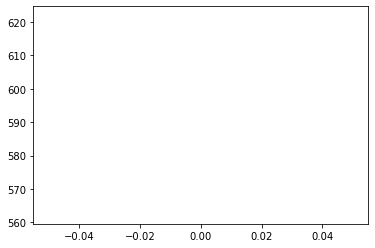

In [112]:
start = time.time()
theta, error_list  = gradient_descent(X,y)
end = time.time()
print("Time taken: ",end-start)

plt.plot(error_list)
plt.show()

In [113]:
def r2_score(Y, Y_): 
    num = np.sum((Y - Y_)**2)
    den = np.sum((Y - Y.mean())**2)  
    score = (1-num/den)
    return score*100

In [114]:
y_ = []
m = X.shape[0]
for i in range(m):
    pred = hypothesis(X[i], theta)
    y_.append(pred)
    
y_ = np.array(y_)

score = r2_score(y,y_)
print(score)

-447.81198827078015
